# 决策树基本概念

**分类决策树模型**是一种描述对实例进行分类的树形结构。决策树（Decision Dree）由节点(node)和有向边(directed edge)组成。节点有两种类型：内部节点和叶节点。内部节点表示一个特征或属性，叶节点表示一个类。

用决策树分类，从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子节点；这时，每一个子节点对应着该特征的一个取值。如此递归地对实例进行测试并分类，直至达到叶节点。最后将实例分到叶结点的类中。

最早提及决策树思想的是**Quinlan**在1986年提出的**ID3算法**和1993年提出的**C4.5算法**，以及Breiman等人在1984年提出的**CART算法**。决策树是一类常见的机器学习方法，采用的是自顶向下的递归方法。它把分类和回归问题归结为做出一系列子决策，通过一系列子决策组合得到的结果来做出最终决策。本篇文章将主要介绍上面这3种常见决策树算法（ID3、C4.5、CART）原理及其代码实现。

决策树在使用数据训练的过程中会建立一棵树，使用这棵树来预测未知样本的类别或回归值。在构建决策树时，我们会遍历数据的每一维特征，并在每一位特征上进行插值，以搜索最大信息增益或最小的子区间的信息熵之和。这涉及到信息熵和基尼系数的概念。

决策树的分类：决策树可以分为两类，主要取决于它目标变量的类型。

**离散性决策树**：离散性决策树，其目标变量是离散的，如性别：男或女等；

**连续性决策树**：连续性决策树，其目标变量是连续的，如工资、价格、年龄等；

以鸢尾花数据集为例，上一章介绍了鸢尾花的**4个特征**为Sepal Length（花萼长度）、Sepal Width（花萼宽度）、Petal Length（花瓣长度）、Petal Width（花瓣宽度），以及鸢尾花卉属于iris Setosa（山鸢尾），iris Versicolour（杂色鸢尾），iris Virginica（维吉尼亚变色鸢尾）的**三个种类**。

如下一个朴素的决策树结构图，从根节点开始，第一个划分特征是花瓣长度（petal length），第一次划分后所得的左分支节点全是山鸢尾，共50个样本，第二次划分属性为花瓣宽度....。如果构造了这样一棵决策树，当一个新的样本数据到来时，就可以从根开始不断比较属性寻找分枝，直到树的叶子节点，从而做出决策判断。

![jupyter](./img/deci-tree-1.jpg)

可以将决策树看成是一个if-then规则的集合：从决策树的根开始到叶子节点的每一条路径都是一条规则的集合，内部节点的特征对应规则的条件，叶节点对应结论。决策树上的路径或者规则的集合具有一个重要的性质：互斥并且完备。

# 决策树构造
## 决策树

决策树学习的算法通常是一个递归地选择最优特征，并根据该特征对训练数据进行分割，使得各个子数据集有一个最好的分类的过程。这一过程对应着对特征空间的划分，也对应着决策树的构建。

决策树的构造过程一般分为3个部分，分别是特征选择、决策树生产和决策树裁剪。

**（1）特征选择**：

特征选择表示从众多的特征中选择一个特征作为当前节点分裂的标准，如何选择特征有不同的**量化评估方法**，从而衍生出不同的决策树，如ID3算法通过**信息增益**选择特征、C4.5算法通过**信息增益比**选择特征、CART算法通过**Gini指数**选择特征等。

特征选择的通常准则：使用某特征对数据集划分之后，各数据子集的**纯度**要比划分前的数据集D的纯度高（也就是**不确定性**要比划分前数据集D的不确定性低）。

**（2）决策树的生成**

根据选择的特征评估标准，从上至下递归地生成子节点，直到数据集不可分则停止决策树生长。这个过程实际上就是使用满足划分准则的特征不断的将数据集划分成纯度更高、不确定性更小的子集的过程。对于当前数据集的每一次划分，都希望根据某个特征划分之后的各个子集的纯度更高，不确定性更小。

**（3）决策树的裁剪**

决策树容易过拟合，一般需要剪枝来缩小树结构规模、缓解过拟合。

决策树的特点：

**优点**：计算复杂度不高，分类速度快，能在相对短的时间内对大型数据源做出可行且效果良好的结果，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。

**缺点**：对未知的测试数据未必有好的分类和泛化能力，即可能发生过拟合现象，此时可采用剪枝或随机森林。

使用决策树做预测需要以下过程：

**收集数据**：可以使用任何方法收集供我们利用的数据。

**准备数据**：即对收集完的数据按照一定规则整进行整理，并排版，方便进行后续处理。

**分析数据**：可以使用任何方法，决策树构造完成之后，我们可以检查决策树图形是否符合预期。

**训练算法**：这个过程也就是构造决策树,形成一个决策树的数据结构，也可以说是决策树学习。

**测试算法***：使用经验树计算错误率。当错误率达到了可接收范围，这个决策树就可以投入使用了。

**使用算法**：此步骤可以使用适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义。

## 有关概念

在决策树开始阶段，需要选择**最优特征**划分数据集，特征选择就是决定用哪个特征来划分特征空间形成树的分枝。划分数据集的大原则是将无序数据变得更加有序，但是各种方法都有各自的优缺点。

信息论是量化处理信息的分支科学，在划分数据集前后信息发生的变化称为**信息增益**，获得信息增益最高的特征就是最好的选择，所以必须先学习如何计算信息增益等概念。

**（1）熵**

所谓“熵”，是德国物理学家克劳修斯在1850年创造的一个术语，用来表示任何一种能量在空间中分布的均匀程度。**能量分布越均匀，熵就越大**。比如，假设一个物理系统仅由两个物体构成，它们可能有两种情况：一种是一个高温物体和一个低温物体，另一种情况是两个等温物体。则第二种情况的熵比第一种情况要高，因为第二种情况中的能量分布更加均匀。

1948年，美国信息学家香农shannon在《信息论》中借用了熵的概念，提出了著名的“信息熵”，或称为“香农熵”，简称“**熵**”。在信息论中，**熵（entropy）是随机变量不确定性的度量，也就是熵越大，随机变量的的不确定性越大**。

设$X$是一个值域有限的离散随机变量，其概率分布为：$$P(X=x_i)=p_i, i=1,2,3,\cdot,n$$且各个事件的出现彼此独立。这时，信源的平均不确定性应当为单个符号不确定性$-logp_i$的统计平均值(E)，则**随机变量$X$的熵定义**为：$$H(X)=E[-logp_i]=-\sum_{i=1}^{n}p_ilog_2p_i$$
由定义可知，熵只依赖于X的分布，而与X的取值无关。

例如，对于样本集合D来说，随机变量X是样本的类别，即，假设样本有k个类别，每个类别的概率是$\cfrac{|C_k|}{|D|}$，其中$|C_k|$表示类别k的样本个数，|D|表示样本总数，则对于样本集合D来说熵（经验熵）为：$$H(D)=-\sum_{k=1}^{K}\cfrac{|C_k|}{|D|}log_2\cfrac{|C_k|}{|D|}$$
信息熵是事物不确定性的度量标准，也称为信息的单位或“测度”。在决策树中，它不仅用来度量类别的不确定性，也可以用来度量包含不同特征的数据样本与类别的不确定性。某个特征列向量的**信息熵越大**，就说明该向量的不确定性程度越大，即混乱程度越大，**就应该优先从该特征向量着手来进行划分**。信息熵决策树划分提供了最重要的依据和标准。

**（2）条件熵**

设随机变量$(X,Y)$,其联合概率分布是：$P(X=x_i,Y=y_j)=p_{ij},i=1,2,\cdots,n,   j=1,2,\cdots,m$，条件熵$H(Y|X)$表示在已知随机变量$X$的条件下，随机变量$Y$的不确定性。随机变量$X$给定的条件下随机变量Y的**条件熵**$H(Y|X)$，定义为$X$给定条件下$Y$的条件概率分布的熵对$X$的数学期望：$$H(Y|X)=\sum_{i=1}^{n}p_iH(Y|X=x_i)$$其中$p_i=P(X=x_i),i=1,2,\cdots,n$。当熵和条件熵中的概率由数据估计得到时（如极大似然估计），所对应的熵与条件熵分别称为经验熵和经验条件熵。

有个学生的例子，如图。一个包含30个学生的样本，每个样本有三种特征，分别是：性别（男/女）、班级（IX/X）和高度（5到6ft）。其中30个学生里面有15个学生喜欢在闲暇时间玩板球（标签、类别）。通过上面的公式来进行计算条件熵。
![jupyter](./img/deci-tree-2.png)

正例（喜欢板球）占$\cfrac{15}{30}$，反例占$\cfrac{15}{30}$，类别为2，则根节点或集合$D$的信息熵为：$$H(D)=-\sum_{k=1}^{2}\cfrac{|C_k|}{|D|}log_2\cfrac{|C_k|}{|D|}=-2*\cfrac{15}{30}log_2\cfrac{15}{30}=1$$
                                                             
如果以性别为条件X，则条件熵为：$$H(Y|X)=\sum_{i=1}^{n}p_iH(Y|X=x_i)=\cfrac{10}{30}*\cfrac{2}{10}+\cfrac{20}{30}*\cfrac{13}{20}=0.5$$

**（3）信息增益**

什么是信息增益呢？信息增益表示由于得知特征$A$的信息后,数据集D的分类不确定性减少的程度，定义为：$$Gain(D,A) = H(D) – H(D|A)$$即集合$D$的经验熵$H(D)$与特征$A$给定条件下$D$的经验条件熵$H(H|A)$之差。

更具信息增益准则的特征**选择方法**是：对训练数据集D，计算其每个特征的信息增益，并他们的大小，选择信息增益最大的特征。

理解：**选择划分后信息增益最高的特征作为划分特征**，说明使用该特征后划分得到的子集纯度越高，即不确定性越小。因此我们总是选择当前使得信息增益最大的特征来划分数据集。

缺点：信息增益偏向取值较多的特征（原因：当特征的取值较多时，根据此特征划分更容易得到纯度更高的子集，因此划分后的熵更低，即不确定性更低，因此信息增益更大）。

**（4）信息增益比**

信息增益会偏向取值较多的特征，使用信息增益比可以对这一问题进行校正。

定义：特征A对训练数据集D的信息增益比$GainRatio(D,A)$定义为其信息增益$Gain(D,A)$与训练数据集$D$的经验熵$H(D)$之比：$$GainRatio(D,A)=\cfrac{Gain(D,A)}{H(D)}$$

**（5）Gini指数**

信息熵是衡量信息不确定性的指标，实际上也是衡量信息“纯度”的指标。除此之外，**基尼指数（Gini impurity）**也是衡量信息不纯度的指标。假设有K个类，样本点属于第k类的概率为$p_k$,概率分布的基尼指数**定义**为：$$Gini(p)=\sum_{k=1}^{K}p_k(1-p_k)=1-\sum_{k=1}^{K}p_k^2$$
对于给定的样本集合$D$，其**基尼指数**为：$$Gini(D)=1-\sum_{k=1}^{K}(\cfrac {|C_k|}{|D|})^2$$

如果样本集合D根据特征A是否取某一可能值a被分割成D1和D2两部分，即：$$D_1=\lbrace(x,y)\in D|A(x)=a\rbrace,D_2=D-D_1$$ 则在特征A的条件下，**集合D的基尼指数定义为**：$$Gini(D,A)=\cfrac{|D_1|}{|D|}Gini(D_1)+\cfrac{|D_2|}{|D|}Gini(D_2)$$基尼指数$Gini(D)$表示集合D的不确定性，基尼指数$Gini(D,A)$表示经$A=a$分割后集合D的不确定性。基尼指数值越大，样本集合的不确定性也就越大，这一点跟熵相似。

下面通过学生的例子来说明基尼公式的计算。
![jupyter](./img/deci-tree-2.png)
如下，可以Gini(D,Gender)最小，所以选择性别作为最优特征。
$$Gini(D,Gender)=\cfrac{10}{30}\lbrace2*\cfrac{2}{10}*(1-\cfrac{2}{10})\rbrace+\cfrac{20}{30}\lbrace2*\cfrac{13}{20}*(1-\cfrac{13}{20})\rbrace=0.41$$  
$$Gini(D,Height)=\cfrac{12}{30}\lbrace2*\cfrac{5}{12}*(1-\cfrac{5}{12})\rbrace+\cfrac{18}{30}\lbrace2*\cfrac{10}{18}*(1-\cfrac{10}{18})\rbrace=0.4907$$  
$$Gini(D,Class)=\cfrac{14}{30}\lbrace2*\cfrac{5}{14}*(1-\cfrac{5}{14})\rbrace+\cfrac{14}{30}\lbrace2*\cfrac{9}{16}*(1-\cfrac{9}{16})\rbrace=0.4768$$

## ID3算法

著名的ID3决策树学习算法就是**以信息增益为准则**来选择划分属性。ID3算法的核心是在决策树各个节点上应用信息增益准则选择特征，递归的构建决策树。**具体方法**是：从根结点开始，对结点计算所有可能的特征的信息增益，选择信息增益最大的特征作为划分特征，由该特征的不同取值建立子结点；再对子结点递归的调用以上方法，构建决策树；直到所有特征的信息增益均很小或没有特征可以选择为止。ID3相当于用极大似然法进行概率模型的选择。

ID3算法的做法是每次选取当前最佳的特征来分割数据，并**按照该特征的所有可能取值来切分**。也就是说，如果一个特征有4种取值，那么数据将被切分成4份。一旦按照某特征切分后，该特征在之后的算法执行过程中将不会再起作用；另一种方法是**二元切分法**，即每次把数据集切分成两份。如果数据的某特征值等于切分所要求的值，那么这些数据将进入左子树，反之则进入右子树。

除了切分过于迅速外，ID3算法还**存在另一个问题**，它不能直接处理连续型特征。只有事先将连续型特征转为离散型，才能在ID3中使用。 但这种转换过程会破坏连续型变量的内在性质。而使用**二元切分法**则易于对树构建过程中进行调整以处理连续型特征。具体的处理方法是: 如果特征值大于给定值就走左子树，否则走右子树。另外二元切分法也节省了树的构建时间。 同时，ID3算法对于缺失值的情况没有考虑。

下图是一个判断西瓜是否是好瓜的统计表。样本具有6个特征，最后一例是标签，是好瓜为正列，否则为反列。下面的计算说明了ID3算法的思想。

In [58]:
#运行，得到西瓜数据
import numpy as np
import pandas as pd
#在下面添加此代码以显示单元格中的所有输出
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

#读取指定索引字段值
csv_data=pd.read_csv(".\DataSet\watermelon_3.csv",encoding='gbk',usecols=['色泽','根蒂','敲声','纹理','脐部','触感','好瓜'])
print(csv_data)

    色泽  根蒂  敲声  纹理  脐部  触感 好瓜
0   青绿  蜷缩  浊响  清晰  凹陷  硬滑  是
1   乌黑  蜷缩  沉闷  清晰  凹陷  硬滑  是
2   乌黑  蜷缩  浊响  清晰  凹陷  硬滑  是
3   青绿  蜷缩  沉闷  清晰  凹陷  硬滑  是
4   浅白  蜷缩  浊响  清晰  凹陷  硬滑  是
5   青绿  稍蜷  浊响  清晰  稍凹  软粘  是
6   乌黑  稍蜷  浊响  稍糊  稍凹  软粘  是
7   乌黑  稍蜷  浊响  清晰  稍凹  硬滑  是
8   乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑  否
9   青绿  硬挺  清脆  清晰  平坦  软粘  否
10  浅白  硬挺  清脆  模糊  平坦  硬滑  否
11  浅白  蜷缩  浊响  模糊  平坦  软粘  否
12  青绿  稍蜷  浊响  稍糊  凹陷  硬滑  否
13  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑  否
14  乌黑  稍蜷  浊响  清晰  稍凹  软粘  否
15  浅白  蜷缩  浊响  模糊  平坦  硬滑  否
16  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑  否


集合$D$中共17个样本，分为2类（0、1表示）。$p_0=\cfrac{8}{17}$、$p_1=\cfrac{9}{17}$。则集合$D$信息熵计算为：$$H(D)=-\sum_{i=0}^{|Y|}p_klog_2p_k=-(\cfrac{8}{17}log_2\cfrac{8}{17}+\cfrac{9}{17}log_2\cfrac{9}{17})=0.998$$

以特征“色泽”为例计算增益。色泽有三个可能的取值{青绿、乌黑、浅白}，分别记为$D_1(色泽=青绿)$、$D_2(色泽=乌黑)$、$D_3(色泽=浅白)$。若以色泽=乌黑为分支点，则正列4个，反列2个，则信息熵为：$$H(D_2)=-\sum_{i=0}^{|Y|}p_klog_2p_k=-(\cfrac{4}{6}log_2\cfrac{4}{6}+\cfrac{2}{6}log_2\cfrac{2}{6})=0.918$$
同理可算出$$H(D_1)=1.000$$
$$H(D_3)=0.722$$
以色泽=乌黑为分支点，其信息增益为：$$Gain(D，色泽)=H(D)-\sum_{v=1}^{V}\cfrac{|D_v|}{|D|}H(D_v)=0.998-(\cfrac{6}{17}1.000+\cfrac{6}{17}0.918+\cfrac{5}{17}0.722)=0.109$$
同理
$$Gain(D，梗蒂)==0.143$$
$$Gain(D，敲声)==0.141$$
$$Gain(D，纹理)==0.381$$
$$Gain(D，脐部)==0.289$$
$$Gain(D，触感)==0.006$$
显然，纹理的信息增益最大，选择纹理特征作为分支点将获得最大的提升纯度。产生分支后，原来的样本集$D$分为两个子集，对每一个子集使用上述方法。这是一个递归过程，递归有两个终止条件：一是所有的特征都用完了，即没有新的特征可以用来进一步划分数据集；二是划分后的信息增益足够小了，这个时候就可以停止递归划分了。针对第二个停止条件，需要事先选择信息增益的阈值来作为结束递归的条件。

**ID3算法的缺点**：

（1）不能对连续数据进行处理，只能通过连续数据离散化进行处理；

（2）采用信息增益进行数据分裂容易偏向取值较多的特征，准确性不如信息增益率；

（3）缺失值不好处理。

（4）没有采用剪枝，决策树的结构可能过于复杂，出现过拟合。

## C4.5算法

C4.5算法过程跟ID3算法一样，只是选择特征的方法由信息增益改成**信息增益比**，在选择分割属性的时候选择信息增益比最大的属性。在树的构造过程中会进行**剪枝优化**操作，能够自动完成对连续属性的**离散化处理**。

针对ID3算法有4点不足，C4.5算法一一作了**改进**：

对于第一个问题，不能处理连续型属性，C4.5的思路是将连续的特征离散化，比如，$m$个样本的连续特征A有m个，从小到大排列为$a_1,a_2,a_3,\cdots,a_m$,则C4.5取相邻两样本值的平均值，一共取得$m-1$个划分点，其中第$i$个划分点表示,对于这$m-1$个划分点，分别计算以该点作为二元分类点的信息增益，以信息增益最大的点作为该连续特征的二元离散分类点，比如取得信息增益最大的点为$a_t$,则小于$a_t$的值为类别1，大于$a_t$的值为类别2，这样我们就做到了连续特征的离散化（计算$m-1$个划分点，当$m$取值很大时，计算量会很大，改进的方法是可以通过去除前后两个类标签相同的切割点以简化计算的复杂度，例如：连续属性$a_i$和$a_j（j-i>>1）$之间的所有样本的标签相同，即都为1或2，那么可以只计算$a_{i-1}$和$a_{i}$、$a_{j-1}$和$a_{j}$之间划分点的信息增益）。要注意的是，与离散属性不同的是，如果当前节点为连续属性，则该属性后面还可以参与子节点的产生选择过程。

对于第二个问题，信息增益容易偏向取值较多的特征的问题，C4.5采用信息增益率的方法，它是信息增益和特征熵的比值，特征数越多的特征对应的特征熵越大，它作为分母，可以校正信息增益偏向取值较多的特征的问题。

对于第三个缺失值处理问题，需要解决的时两方面：一是样本某些特征缺失的情况下选择划分的属性，二是选定了划分属性，对于在该属性上缺失特征的样本的处理。

对于第一个子问题，假设特征$A$有缺失特征值，可以将数据分为两个部分，对每个样本设置一个权重（初始都可以为1），然后划分数据，一部分是有特征值的数据$D_1$，剩下的为$D_2$。然后，对于没有确实特征A的数据集$D_1$来和对应的$A$特征的各个特征值一起计算加权后的信息增益比，最后乘上一个系数，这个系数是无特征缺失的样本加权后所占加权总样本的比例。

对于第二个子问题，可将确实特征的样本同时划分入所有的子节点，不过将该样本的权重按各个子节点样本的数量比例来分配。

对于第四个问题，C4.5引入正则化系数进行初步的剪枝。

优缺点：

优点：产生的规则易于理解；准确率较高；实现简单；

缺点：对数据进行多次顺序扫描和排序，效率较低；只适合小规模数据集，需要将数据放到内存中。

含缺失值特征的信息增益 = 无缺失值样本所占的比例 * 无缺失值样本的信息增益

## CART算法

CART算法使用**Gini增长率**作为分割属性选择的标准，选择Gini增长率最大的作为当前数据集的分割属性。

输入：训练数据集D，停止计算的条件

输出：CART决策树

根据训练数据集，从根结点开始，递归地对每个结点进行以下操作，构建二叉树：

Step1：设结点的训练数据集为D，计算现有特征对该数据集的基尼指数。此时，对每一个特征A，对其可能取的每个值a，根据样本点A=a的测试为“是”或“否”将D分割为D1和D2两部分，利用上式Gini(D,A)来计算A=a时的基尼指数。

Step2：在所有可能的特征A以及他们所有可能的切分点a中，选择基尼指数最小的特征及其对应可能的切分点作为最有特征与最优切分点。依最优特征与最有切分点，从现结点生成两个子节点，将训练数据集依特征分配到两个子节点中去。

Step3：对两个子结点递归地调用Step1、Step2，直至满足条件。

Step4：生成CART决策树

算法**停止计算的条件**是节点中的样本个数小于预定阈值，或样本集的基尼指数小于预定阈值，或者没有更多特征。

## 决策树停止分裂的条件

决策树不可能不限制地生长，总有停止分裂的时候，最极端的情况是当节点分裂到只剩下一个数据点时自动结束分裂，但这种情况下树过于复杂，而且预测的精度不高。一般情况下为了降低决策树复杂度和提高预测的精度，会适当**提前终止节点的分裂**。

以下是决策树节点**停止分裂的一般性条件**：

（1）最小节点数

当节点的数据量小于一个指定的数量时，不继续分裂。两个原因：一是数据量较少时，再做分裂容易强化噪声数据的作用；二是降低树生长的复杂性。提前结束分裂一定程度上有利于降低过拟合的影响。

（2）熵或者基尼值小于阀值。

 由上述可知，熵和基尼值的大小表示数据的复杂程度，当熵或者基尼值过小时，表示数据的纯度比较大，如果熵或者基尼值小于一定程度数，节点停止分裂。

（3）决策树的深度达到指定的条件

节点的深度可以理解为节点与决策树跟节点的距离，如根节点的子节点的深度为1，因为这些节点与跟节点的距离为1，子节点的深度要比父节点的深度大1。决策树的深度是所有叶子节点的最大深度，当深度到达指定的上限大小时，停止分裂。

(4）所有特征已经使用完毕，不能继续进行分裂。

 被动式停止分裂的条件，当已经没有可分的属性时，直接将当前节点设置为叶子节点。

## Scikit-Learn实现决策树

Sklearn实现了以下四种类型的树：决策树分类器、回归树、一种非常随机的树分类器、一种非常随机的树回归器。scikit-learn使用**Sklearn.tree.DecisionTreeClassifier类**来实现决策树分类算法。其中函数原型和几个典型的参数如下：

**sklearn.tree.DecisionTreeClassifier**(criterion='gini’,splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

参数描述：

**criterion**：特征选择标准。可以使用"gini"或者"entropy"，前者代表基尼系数，指定用基尼不纯度，使用**CART决策树算法**，后者代表信息增益，使用**ID3、C4.5算法**。一般使用默认的基尼系数"gini"就可以了。除非你更喜欢类似ID3, C4.5的最优特征选择方法。 

**splitter**：特征划分点选择标准，用来指定怎么寻找最优划分点，有"best"和"random"两个选择，前者在所有特征中找出最优的划分点，后者是随机的在部分划分点中找局部最优的划分点。默认的"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"。

**max_features**：划分时考虑的最大特征数。可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑$log_2$个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑$\sqrt{n}$。一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。

**max_depth**: 默认=None，用来指定决策树的最大深度，对于防止过拟合非常有用。如果不指定，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不指定，如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。也可以在数据可视化情况下查看拟合情况，再调整树的深度。

**min_samples_split**:内部节点再划分所需最小样本数，这个值限制了子树继续划分的条件，默认是2时，当只有一个样本的时候不在划分子树。当样本数很大时，才会考虑增加这个值限制决策树增长，避免过拟合。

**min_samples_leaf**:叶子节点最少样本数。这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

**min_weight_fraction_leaf**：叶子节点最小的样本权重和，默认=0。这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

**class_weight**: 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"。

**random_state**: int型RandomState实例或None，可选(默认=None)如果是int, random_state是随机数生成器使用的种子;如果是RandomState实例，random_state是随机数生成器;如果没有，随机数生成器是np.random使用的RandomState实例。

**max_leaf_nodes**：最大叶子节点数，即数据集最多能划分成几个类别。通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。

**min_impurity_split**：这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点，即为叶子节点 。默认值为1e-7。**该参数值0.25版本之后将取消，由min_impurity_decrease代替**。

**presort**：数据是否预排序。这个值是布尔值，默认是False不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，我速度本来就不慢。所以这个值一般懒得理它就可以了。

从这些参数可以看出，scikit-learn有一系列的参数用来控制决策树的生成过程，从而解决过拟合问题。

除了这些参数要注意以外，其他在调参时的**注意点**有：

1）当样本少数量但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型。

2）如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。

3）推荐多用决策树的可视化（下节会讲），同时先限制决策树的深度（比如最多3层），这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。

4）在训练模型时，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。

5）决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。

6）如果输入的样本矩阵是稀疏的，推荐在拟合前调用csc_matrix稀疏化，在预测前调用csr_matrix稀疏化。

使用信息增益作为特征选择指标的决策树构建算法，称为ID3算法。下面采用Scikit-Learn为鸢尾花实现分类决策树。

In [59]:
#coding:utf-8
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
#载入数据集
iris = datasets.load_iris()
#数据预处理--归一化
iris.data=Normalizer().fit_transform(iris.data)
iris_data = iris["data"]#或iris.data
iris_label = iris["target"]#或iris.target
iris_target_name = iris['target_names']

X = np.array(iris_data)
Y = np.array(iris_label)
#交叉验证
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

#设计模型
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#模型训练
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
print('模型准确率为：{:.2f}'.format(accuracy * 100))
#预测
predict = clf.predict(X_test)
sum = 0# 正确预测的样本个数
for i in range(len(Y_test)):
    if predict[i]==Y_test[i]:
        sum +=1
print("正确预测样本数:%s,测试样本数:%s"%(sum,len(Y_test)))
print("预测率：%s"%(sum/len(Y_test)))

DecisionTreeClassifier(criterion='entropy', max_depth=3)

模型准确率为：86.84
正确预测样本数:33,测试样本数:38
预测率：0.868421052631579


将代码clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)改为使用gini方法，则意味使用CART算法。

predict()函数作用于测试集，也可以用于某样本，测试其分类，相当于一个分类器。


# 算法优化分析

## max_depth参数调整

我们可以选择一系列的参数值，然后分别计算指定参数训练出来的模型的评分。还可以把参数值和模型评分通过图形画出来，以便直观地发现两者之间的关系。

这里以**限制决策树深度**max_depth为了来介绍模型参数的优化过程。我们先创建一个函数，它使用不同的max_depth来训练模型，并计算模型评分。

In [60]:
#上述算法运行完毕，装载了库，并得到训练集和测试集X_train,X_test,Y_train,Y_test
#参数选择 max_depth
from sklearn import tree
def cv_score(d):
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train,Y_train)
    tr_score = clf.score(X_train,Y_train)
    cv_score = clf.score(X_test,Y_test)
    return (tr_score,cv_score)#训练评分、测试评分

接着构造参数范围，在这个范围内分别计算模型评分，并找出评分最高的模型所对应的参数。

In [61]:
#import numpy as np
depths = range(2,15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
print('（训练成绩，测试成绩）\n',scores)
print('最好测试成绩的深度: {0}； 对应的测试成绩： {1}'.format(best_param,best_score))

（训练成绩，测试成绩）
 [(0.9553571428571429, 0.868421052631579), (0.9553571428571429, 0.868421052631579), (0.9910714285714286, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315), (1.0, 0.9473684210526315)]
最好测试成绩的深度: 4； 对应的测试成绩： 0.9473684210526315


可以看到，针对模型深度这个参数，最优的值是4，其对应的交叉验证数据集评分为 0.94736。（你的结果可能跟我不一样，因为每次划分数据集都是随机的）我们还可以把模型参数和对应的模型评分画出来，更直观地观察其变化规律。

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'max depth of decision tree')

Text(0, 0.5, 'score')

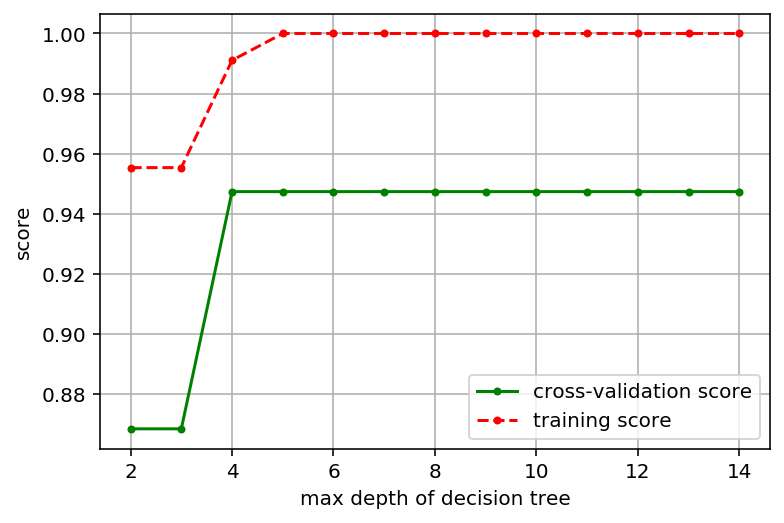

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4),dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths,cv_scores,'.g-',label='cross-validation score')
plt.plot(depths,tr_scores,'.r--',label='training score')
plt.legend()

## min_impurity_split参数调整

使用同样的方式，我们可以考察参数min_impurity_split。这个参数用来指定是**信息熵或基尼不纯度的阈值**。当决策树分裂后，其信息增益低于这个阈值，则不再分裂。

best param: 0.0; best score: 0.9473684210526315


<Figure size 1440x864 with 0 Axes>

Text(0.5, 0, 'threshold of entropy')

Text(0, 0.5, 'score')

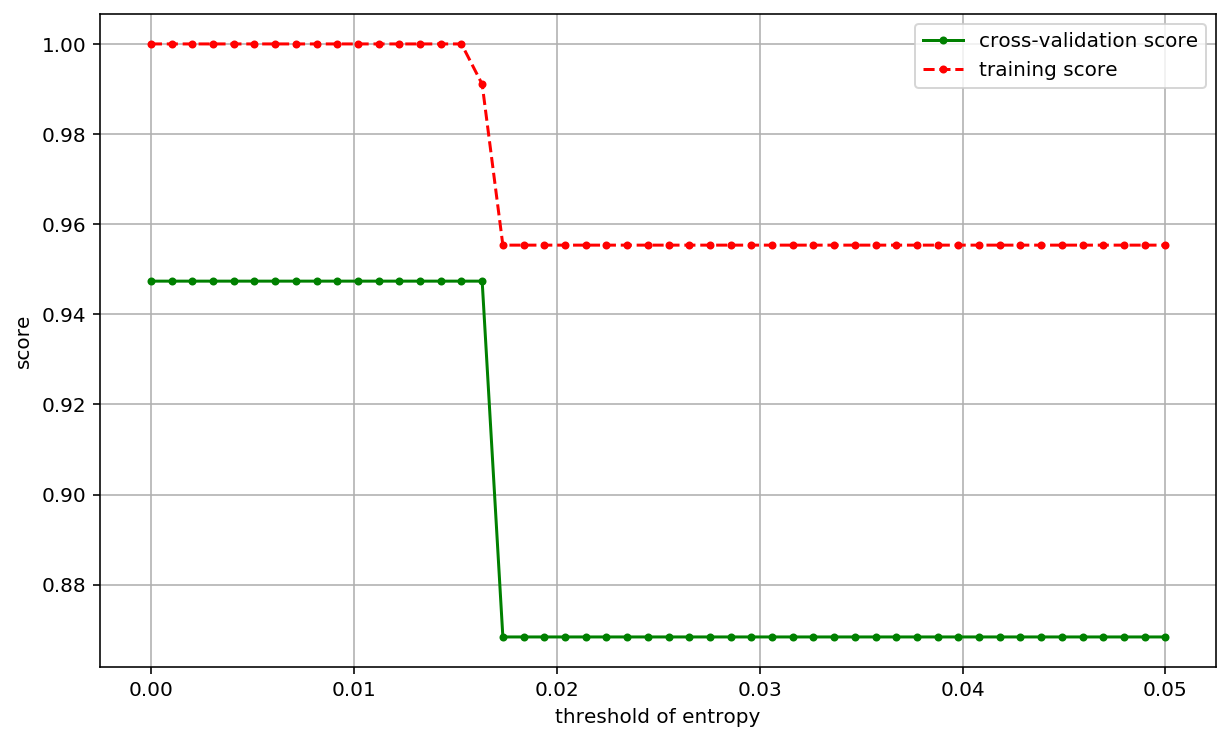

In [63]:
# 训练模型，并计算评分
def cv_score(val):
    clf = tree.DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val)
    clf.fit(X_train, Y_train)
    tr_score = clf.score(X_train, Y_train)
    cv_score = clf.score(X_test, Y_test)
    return (tr_score, cv_score)

# 指定参数范围，分别训练模型，并计算评分
values = np.linspace(0, 0.05, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出评分最高的模型参数
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 画出模型参数与模型评分的关系
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

这里把[0,0.05]等分50份，以每个等分点作为信息增益阈值来训练一次模型。可以看到，训练数据集的评分急速下降，且训练评分和测试评分都保持较低水平，说明模型欠拟合。我们可以把决策树特征选择的基尼不纯度改为信息熵，即把参数criterion的值改为’entropy’观察图形的变化。

## 模型参数选择工具包
上面的模型参数优化过程存在两个问题。

其一，数据不稳定，即数据集每次都是随机划分的，选择出来的最优参数在下一次运行时就不是最优的了。

其二，不能一次选择多个参数，例如，想要考察max_depth和min_samples_leaf两个结合起来的最优参数就无法实现。

问题一的原因是，每次把数据集划分为训练样本和交叉验证样本时，是随机划分的，这样导致每次的训练数据集是有差异的，训练出来的模型也有差异。解决这个问题的方法是多次计算，求**平均值**。具体来讲，就是针对模型的某个特定的参数，多次划分数据集，多次训练模型，计算出这个参数对应的模型的**最低评分、最高评分以及平均评分**。问题二的解决办法比较简单，把代码再优化一下，能处理多个参数组合即可。

所幸，我们不需要从头实现这些代码。scikit-learn在sklearn.model_selection包里提供了大量模型选择和评估工具供我们使用。针对以上问题，可以使用**GridSearchCV类**来解决。

GridSearchCV的sklearn官方网址：http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

### 模型调参利器 gridSearchCV
GridSearchCV，它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果。这个时候就是需要动脑筋了。数据量比较大的时候可以使用一个快速调优的方法——坐标下降。它其实是一种贪心算法：拿当前对模型影响最大的参数调优，直到最优化；再拿下一个影响最大的参数调优，如此下去，直到所有的参数调整完毕。这个方法的缺点就是可能会调到局部最优而不是全局最优，但是省时间省力。

参数说明

class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise’, return_train_score=’warn’)

（1）estimator 选择使用的分类器，并且传入除需要确定最佳的参数之外的其他参数。每一个分类器都需要一个scoring参数，或者score方法：estimator=RandomForestClassifier(min_samples_split=100,min_samples_leaf=20,max_depth=8,max_features='sqrt',random_state=10)

（2）**param_grid **需要最优化的参数的取值，值为字典或者列表，例如：param_grid =param_test1，param_test1 = {'n_estimators':range(10,71,10)}。

（3）scoring=None 模型评价标准，默认None,这时需要使用score函数；或者如scoring='roc_auc'，根据所选模型不同，评价准则不同。字符串（函数名），或是可调用对象，需要其函数签名形如：scorer(estimator, X, y)；如果是None，则使用estimator的误差估计函数。

（4）fit_params=None

（5）n_jobs=1 n_jobs: 并行数，int：个数,-1：跟CPU核数一致, 1:默认值

（6）iid=True

iid:默认True,为True时，默认为各个样本fold概率分布一致，误差估计为所有样本之和，而非各个fold的平均。

（7）refit=True

默认为True,程序将会以交叉验证训练集得到的最佳参数，重新对所有可用的训练集与开发集进行，作为最终用于性能评估的最佳模型参数。即在搜索参数结束后，用最佳参数结果再次fit一遍全部数据集。

（8）**cv=None**交叉验证参数，默认None，使用三折交叉验证。指定fold数量，默认为3，也可以是yield训练/测试数据的生成器。

（9）verbose=0, scoring=None

verbose：日志冗长度，int：冗长度，0：不输出训练过程，1：偶尔输出，>1：对每个子模型都输出。

（10）pre_dispatch=‘2*n_jobs’

指定总共分发的并行任务数。当n_jobs大于1时，数据将在每个运行点进行复制，这可能导致OOM，而设置pre_dispatch参数，则可以预先划分总共的job数量，使数据最多被复制pre_dispatch次。

（11）error_score=’raise’

（12）return_train_score=’warn’

如果“False”，cv_results_属性将不包括训练分数

**结果属性**：

（1）**cv_results_ **: dict of numpy (masked) ndarrays具有键作为列标题和值作为列的dict，可以导入到DataFrame中。注意，“params”键用于存储所有参数候选项的参数设置列表。

（2）best_estimator_ : estimator通过搜索选择的估计器，即在左侧数据上给出最高分数（或指定的最小损失）的估计器。 如果refit = False，则不可用。

（3）**best_score_** : float    best_estimator的分数

（4）**best_params_** : dict   在保存数据上给出最佳结果的参数设置

（5）best_index_ : int      对应于最佳候选参数设置的索引（cv_results_数组）。search.cv_results _ ['params'] [search.best_index_]中的dict给出了最佳模型的参数设置，给出了最高的平均分数（search.best_score_）。

（6）scorer_ : function

Scorer function used on the held out data to choose the best parameters for the model.

（7）n_splits_ : int

The number of cross-validation splits (folds/iterations).

（8）grid_scores_：给出不同参数情况下的评价结果

### 调参实例

下面先看一下使用GridSearchCV选择一个参数的最优值。

f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_spl

f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_spl

f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_spl

f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_spl

f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
f:\ProgramData\Miniconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_spl

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'min_impurity_split': array([0.        , 0.00102041, 0.00204082, 0.00306122, 0.00408163,
       0.00510204, 0.00612245, 0.00714286, 0.00816327, 0.00918367,
       0.01020408, 0.01122449, 0.0122449 , 0.01326531, 0.01428571,
       0.01530612, 0.01632653, 0.01734694, 0.01836735, 0.01938776,
       0.02040816, 0.02142857, 0.02244898, 0.02346939, 0.0244898 ,
       0.0255102 , 0.02653061, 0.02755102, 0.02857143, 0.02959184,
       0.03061224, 0.03163265, 0.03265306, 0.03367347, 0.03469388,
       0.03571429, 0.03673469, 0.0377551 , 0.03877551, 0.03979592,
       0.04081633, 0.04183673, 0.04285714, 0.04387755, 0.04489796,
       0.04591837, 0.04693878, 0.04795918, 0.04897959, 0.05      ])})

best param: {'min_impurity_split': 0.004081632653061225}
best score: 0.9106719367588934


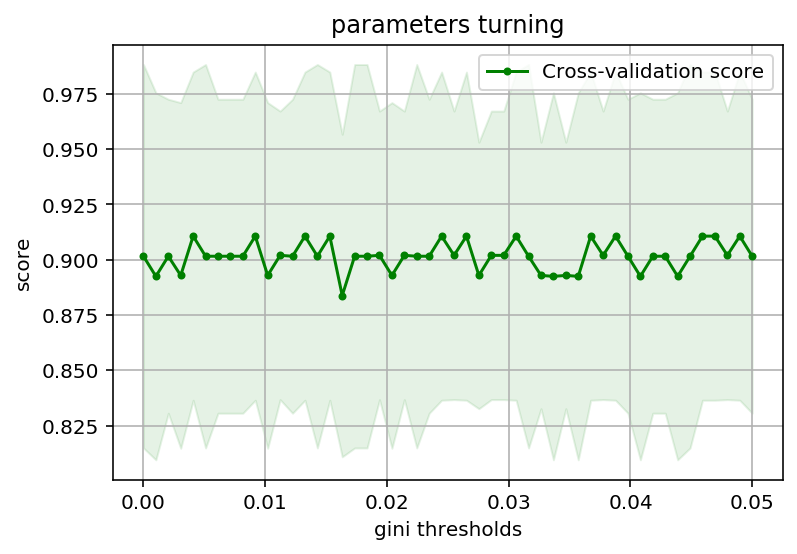

In [64]:
#import pandas as pd
from sklearn.model_selection import GridSearchCV
def plot_curve(train_sizes,cv_results,xlabel):
    #train_scores_mean = cv_results['mean_train_score']#无此属性
    #train_scores_std = cv_results['std_train_score']#无此属性
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(6,4),dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    '''
    plt.fill_between(train_sizes,
                     train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,
                     alpha=0.1,color='r')
    '''
    plt.fill_between(train_sizes,
                     test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,
                     alpha=0.1,color='g')
    #plt.plot(train_sizes,train_scores_mean,'.--',color='r',label='Training score')
    plt.plot(train_sizes,test_scores_mean,'.-',color='g',label='Cross-validation score')
    plt.legend(loc='best')
    
thresholds = np.linspace(0,0.05,50)
param_grid = {'min_impurity_split':thresholds}
clf = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,cv=5)
clf.fit(X_train, Y_train)
print("best param: {0}\nbest score: {1}".format(clf.best_params_,clf.best_score_))
plot_curve(thresholds,clf.cv_results_,xlabel='gini thresholds')

In [65]:
clf.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_impurity_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

其中显示的结果是：

best param: {'min_impurity_split': 0.0030612244897959186}

best score: 0.9106719367588934

关键的参数是param_grid，它是一个字典，键对应的值是一个列表。GridSearchCV会枚举列表里的所有值来构建模型，最终得出指定参数值的平均评分及标准差。另外一个关键参数是cv，它用来指定交叉验证数据集的生成规则，代码中的cv=5，表示每次计算都把数据集分成5份，拿其中一份作为交叉验证数据集，其他的作为训练数据集。最终得出的最优参数及最优评分保存在clf.best_params_和clf.best_score_里。此外，clf.cv_results_保存了计算过程的所有中间结果。我们可以拿这个数据来画出模型参数与模型评分的关系图，如下所示。

# 决策树修剪

## 决策树剪枝

使用决策树模型拟合数据时，容易造成**过拟合**。解决过拟合的方法是对决策树进行剪枝处理。决策树的剪枝有两种思路：前剪枝（Pre-Pruning）和后剪枝（Post-Pruning）。

1.**前剪枝（Pre-Pruning）**

前剪枝是在构造决策树的同时进行剪枝。在决策树的构建过程中，如果无法进一步降低信息熵，就会停止创建分支。为了避免过拟合，可以设定一个阈值，即使可以继续降低信息熵，也停止继续创建分支。这种方法称为前剪枝。还有一些简单的前剪枝方法，如限制叶子节点的样本个数，当样本个数小于一定的阈值时，即不再继续创建分支。

2.**后剪枝（Post-Pruning）**

后剪枝是指决策树构建完成之后进行剪枝。剪枝的过程是对拥有同样父节点的一组节点进行检查，判断如果将其合并，信息熵的增加量是否小于某一阈值。如果小于阈值，则这一组节点可以合并成一个节点。**后剪枝是目前较普遍的做法**。后剪枝的过程是删除一些子树，然后用子树的根节点代替，来作为新的叶子结点。这个新的叶子节点所标识的类别通过大多数原则来确定，即把这个叶子节点里样本最多的类别，作为这个叶子节点的类别。

后剪枝算法有很多种，其中常用的一种称为**降低错误率剪枝法（Reduced-Error Pruning）**。其思路是，自底向上，从已经构建好的完全决策树中找出一棵子树，然后用子树的根代替这棵子树，作为新的叶子节点。叶子节点所标识的类别通过大多数原则来确定。这样就构建出了一个新的简化版的决策树。然后使用交叉验证数据集来检测这棵简化版的决策树，看其错误率是否降低了。如果错误率降低了，则可以使用这个简化版的决策树代替完全决策树。否则，还是采用原来的决策树。通过遍历所有的子树，直到针对交叉验证数据集，无法进一步降低错误率为止。

## 后剪枝处理

对于后剪枝策略，可以通过极小化决策树整体的损失函数(Cost function)来实现。设树T的叶节点个数为|T|，t是树T的叶结点，该叶节点有$N_t$个样本点，其中k类的样本点有$N_{tk}$个，$k=1,2,\cdots,K$，$H_t(T)$为叶结点t上的经验熵，α≥0为参数，则决策树学习的损失函数可以定义为：$$C_a(T)=\sum_{t=1}^{|T|}N_tH_t(T)+a|T|$$
其中经验熵$H_t(T)$为：$$H_t(T)=-\sum_k\cfrac{N_{tk}}{N_t}log\cfrac{N_{tk}}{N_t}$$
令C(T)表示模型对训练数据预测误差，即模型与训练数据的拟合程度，|T|表示模型的复杂度，参数α≥0调节二者关系。

$C(T)=\sum_{t=1}^{|T|}N_tH_t(T)=-\sum_{t=1}^{|T|}\sum_{k=1}^{K}N_{tk}log\cfrac{N_{tk}}{N_t}$

这时损失函数变为：$$C_a(T)=C(T)-a|T|$$
较大的α促使树的结构更简单，较小的α促使树的结构更复杂，α=0意味着不考虑树的复杂度（α|T|就是正则项，加入约束，使得模型简单，避免过拟合）。

## 决策树可视化

scikit-learn中决策树的可视化一般**需要安装graphviz(一款图像可视化软件)**。主要包括graphviz的安装和python的pydotplus插件的安装。

第一步是安装graphviz。下载地址在：http://www.graphviz.org/

如果你是linux，可以用apt-get或者yum的方法安装。如果是windows，就在官网下载msi文件安装。无论是linux还是windows，装完后都要设置环境变量，将graphviz的bin目录加到PATH。

第二步是安装python插件graphviz： pip install graphviz

第三步是安装python插件pydotplus: pip install pydotplus

决策树可视化有三种方法，我们skLearn自带的约会数据为例，分别讲解三种方法。
首先载入类库：

In [66]:
from sklearn.datasets import load_iris
from sklearn import tree
import sys
import os       
os.environ["PATH"] += os.pathsep + 'f:/Program Files (x86)/Graphviz2.38/bin/'

接着载入sciki-learn的自带数据，有决策树拟合，得到模型：

In [67]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

现在可以将模型存入dot文件iris1.dot。

In [68]:
with open(".\DataSet\iris1.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

这时候我们有3种可视化方法，第一种是用graphviz的dot命令生成决策树的可视化文件，敲完这个命令后当前目录就可以看到决策树的可视化文件iris.pdf.打开可以看到决策树的模型图。

#此处，进入dot文件所在的目录，在命令行运行如下命令之后，生成PDF文件，打开即可。
dot -Tpdf iris1.dot -o iris1.pdf

第二种方法是用pydotplus生成iris2.pdf。这样就不用再命令行去专门生成pdf文件了。

In [69]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf(".\DataSet\iris2.pdf") 

True

第三种办法是个人比较推荐的做法，因为这样可以直接把图产生在ipython的notebook。代码如下

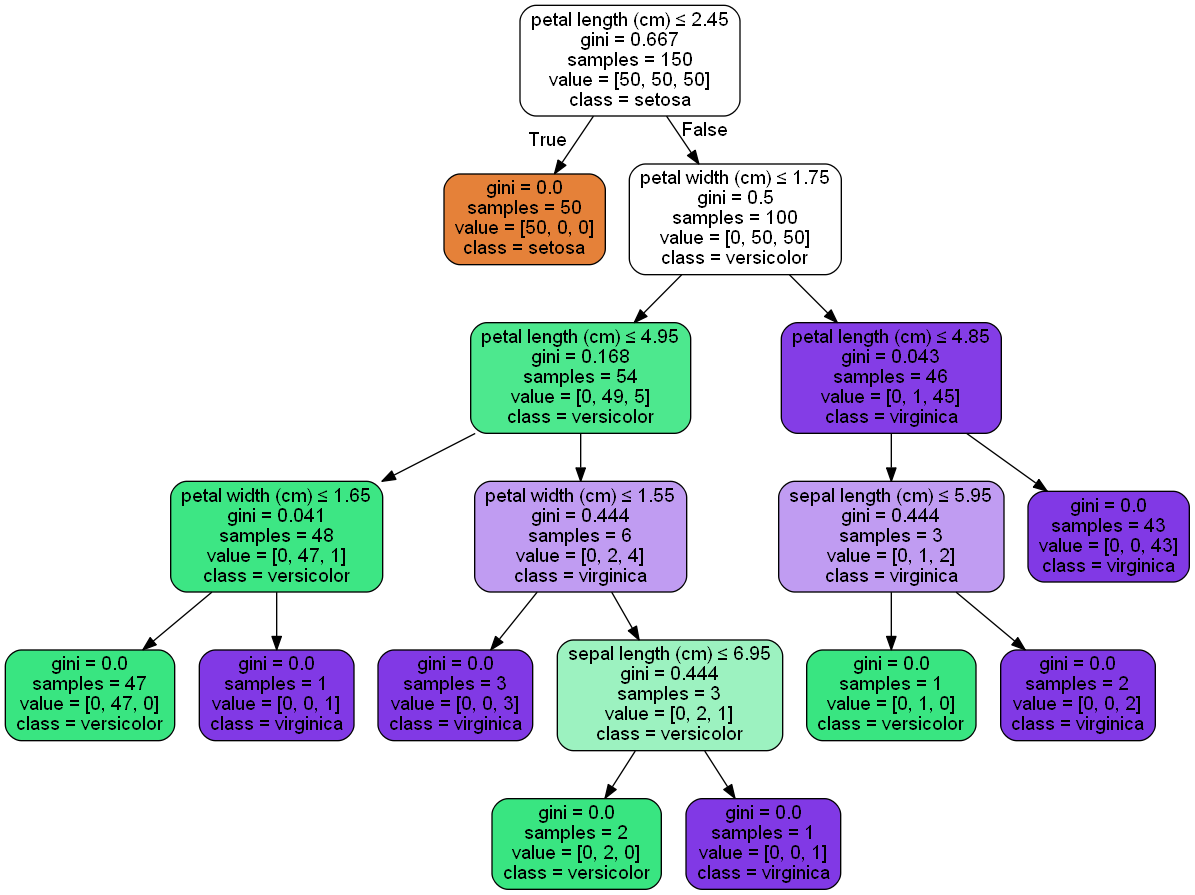

In [70]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# 手工实现决策树

## 西瓜数据集
使用西瓜数据文件watermelon_3.csv,其中有17个样本。为方便处理，在代码开始部分将6个特征转化为数字表示。

In [71]:
import numpy as np
import csv
code1={'青绿':'1','乌黑':'2','浅白':'3'}
code2={'蜷缩':'1','稍蜷':'2','硬挺':'3'}
code3={'浊响':'1','沉闷':'2','清脆':'3'}
code4={'清晰':'1','稍糊':'2','模糊':'3'}
code5={'凹陷':'1','稍凹':'2','平坦':'3'}
code6={'硬滑':'1','软粘':'2'}
def file2matrix(filename):
    with open(filename,'r') as f:
        lines = f.readlines()
        numberOfLines = len(lines)-1 #获得文件行数。行数：要去掉第一行
        #print(numberOfLines)
        returnMat = np.zeros((numberOfLines,7))#矩阵，训练样本数据。初始为0。
        classLabelVector = []#列表，训练样本标签
        index = -1
        for line in lines:
            #print(line)
            if index==-1:##去掉第一行
                index+=1
                continue
            linelist=line.split(',')
            #print(linelist)
            #选择了西瓜数据六列文本特征
            returnMat[index,0:6]=[code1.get(linelist[1],''),code2.get(linelist[2],''),code3.get(linelist[3],''),code4.get(linelist[4],''),code5.get(linelist[5],''),code6.get(linelist[6],'')]
            returnMat[index,6]=int(linelist[10])
            classLabelVector.append(int(linelist[10]))#最后一列为标签
            index += 1
        return  returnMat,classLabelVector#输出为训练样本矩阵和类标签向量
file2matrix('.\dataSet\watermelon_3.csv')#西瓜数据

(array([[1., 1., 1., 1., 1., 1., 1.],
        [2., 1., 2., 1., 1., 1., 1.],
        [2., 1., 1., 1., 1., 1., 1.],
        [1., 1., 2., 1., 1., 1., 1.],
        [3., 1., 1., 1., 1., 1., 1.],
        [1., 2., 1., 1., 2., 2., 1.],
        [2., 2., 1., 2., 2., 2., 1.],
        [2., 2., 1., 1., 2., 1., 1.],
        [2., 2., 2., 2., 2., 1., 0.],
        [1., 3., 3., 1., 3., 2., 0.],
        [3., 3., 3., 3., 3., 1., 0.],
        [3., 1., 1., 3., 3., 2., 0.],
        [1., 2., 1., 2., 1., 1., 0.],
        [3., 2., 2., 2., 1., 1., 0.],
        [2., 2., 1., 1., 2., 2., 0.],
        [3., 1., 1., 3., 3., 1., 0.],
        [1., 1., 2., 2., 2., 1., 0.]]),
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 计算数据集的香侬熵

按照前述公式计算香农熵代码:

In [72]:
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)#实例总数
    labelCounts = {}#标签字典
    for featVec in dataSet: #the the number of unique elements and their occurance
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys(): labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2) #log base 2
    #print("分类统计值：",labelCounts)
    #{3.0: 327, 2.0: 331, 1.0: 342}
    return shannonEnt

wmMat,wmLabels=file2matrix(".\DataSet\watermelon_3.csv")
calcShannonEnt(wmMat)#(np.column_stack((wmMat,wmLabels)))#先合并数据和标签，再计算熵

0.9975025463691153

熵越高，则混合的数据越多。我们修改或者增加标签，看熵变化。

In [73]:
#连续测试，此cell可以不执行。
#或再次执行上面计算熵的代码
wmMat[0,6]=2
wmMat[1,6]=2
calcShannonEnt(wmMat)#先合并数据和标签，再计算熵
#datingDataMat

1.3792804872910602

## 划分数据集
对每个特征计算一次信息熵，然后判断按照哪个特征划分数据集时最好的划分方式。

下面代码划分数据集。三个参数：待划分数据集、划分数据集的特征列（编号从0开始）、特征值（参数2特征列的值）。返回值：一个矩阵，删除了指定的特征列，并且只有特征列值为指定值的矩阵

In [74]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        #print(featVec[:axis],featVec[axis])
        if featVec[axis] == value:
            reducedFeatVec = list(featVec[:axis])     #chop out axis used for splitting
            reducedFeatVec.extend(featVec[axis+1:])#把一个序列seq的内容添加到列表中
            retDataSet.append(reducedFeatVec)#向列表中添加一个对象object
    return retDataSet
splitDataSet(wmMat,2,1)#返回矩阵，选择第2列为特征，指定第2列值1

[[1.0, 1.0, 1.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [3.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
 [2.0, 2.0, 2.0, 2.0, 2.0, 1.0],
 [2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [3.0, 1.0, 3.0, 3.0, 2.0, 0.0],
 [1.0, 2.0, 2.0, 1.0, 1.0, 0.0],
 [2.0, 2.0, 1.0, 2.0, 2.0, 0.0],
 [3.0, 1.0, 3.0, 3.0, 1.0, 0.0]]

下面将遍历整个数据集，循环计算香农熵和splitDataSet()，目的时选择最好的特征来划分数据。

## 选择划分特征

函数代码如下。参数数据集最后一列是标签，注释给出了代码的解释。

In [75]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1      #最后一列是标签
    baseEntropy = calcShannonEnt(dataSet)#计算整个数据集的香农熵
    bestInfoGain = 0.0; bestFeature = -1#初始化最好的信息增益、特征编号
    for i in range(numFeatures):        #遍历所有特征
        #创建唯一的标签列表
        featList = [example[i] for example in dataSet]#第i个特征的数据形成列表
        uniqueVals = set(featList)       #转换成集合
        newEntropy = 0.0
        #计算每种划分的信息熵
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)#对每个特征用自定义函数划分数据集
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)     
        infoGain = baseEntropy - newEntropy     #按照第i特征划分时的信息增益
        #计算最好信息增益
        if (infoGain > bestInfoGain):       #记录最大信息增益和特征编号
            bestInfoGain = infoGain        
            bestFeature = i
    return bestFeature                      #返回最好的特征编号
chooseBestFeatureToSplit(wmMat)

3

从运行结果可知，第3个特征（即纹理特征）是最好的用于划分数据集的特征。到目前为止，我们就可以构建树的第一个分支了，即按照纹理特征划分数据集，形成分支。下面就利用上述函数，构建决策树。

## 递归构建决策树

前面已经得到了构建决策树需要的函数，可以看到其过程是：形成原始数据集，然后基于最好的特征或者属性划分数据集。当特征值多于两个的时候，可能存在大于两个的数据集划分，因此，需要采用递归的方法处理数据集。

递归结束的条件是：遍历完所有划分数据集的属性（特征），或者每个分支下的所有实例都具有相同的分类。如果所有实例都shi 相同的分类，则得到yi个叶子节点或者终止块。任何达到叶子节点de 数据必然属于叶子节点的分类。

决策树构建代码如下，类似于投票表决。

In [76]:
import operator
def majorityCnt(classList):
    classCount={}#字典。存储classList中每个类标签出现的频率
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


In [77]:
#classList = [example[-1] for example in dataSet]
#classList.count(classList[0])

In [78]:
#参数：原始数据集（数据集最后一列也是标签）、标签
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList): 
        return classList[0]#类别完全相同，停止继续划分。返回类别值
    if len(dataSet[0]) == 1: #遍历完所有特征时，返回出现次数最多的
        return majorityCnt(classList)#返回投票表决结果。
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    #以下三行得到列表包含所有属性值
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]       #copy all of labels, so trees don't mess up existing labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree    

dataSet,labels=file2matrix(".\DataSet\watermelon_3.csv")
print (createTree(dataSet,labels))


{1: {1.0: {1: {1.0: 1.0, 2.0: {1: {1.0: 1.0, 2.0: {1: {1.0: 1.0, 2.0: 0.0}}}}, 3.0: 0.0}}, 2.0: {1: {1.0: 0.0, 2.0: 1.0}}, 3.0: 0.0}}


结果包含了很多代表树结构信息的嵌套字典，第一个关键字1是第一个划分数据集的特征代码（梗蒂），对应的值是另一个字典。一一展开，就得到一棵树。

## 使用Maiplotlib注解绘制树形图
上一部分用字典形式表示树，不易于理解。这里用Matplotlib库的注解工具annotations创建树形图，把决策树直观、易于理解的优势表现出来。

下面代码显示了注释简单应用。plotNode函数执行实际的绘图功能，该函数需要一个绘图区，该区域有全局变量createPlot.ax1定义。

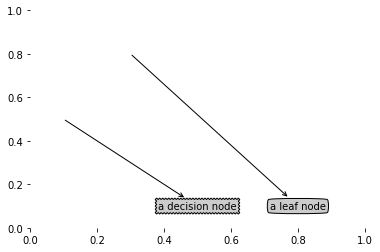

In [79]:
import matplotlib.pyplot as plt
#定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

#绘制带箭头注解
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def createPlot():
    fig = plt.figure(1, facecolor='white')#创建新图形
    fig.clf()#清空绘图区
    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    #绘制两个不同类型的节点
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()  
    
createPlot()

大致了解了绘图，下面我们就扩充createPlot函数。但是绘制图需要一些技巧，如有了x、y坐标，就可以绘图，但是如何防止所有的树节点实在是一个问题。我们必须知道有多少个叶子节点，以便确定x轴的长度，还必须知道树有多少层，以便知道树的高度，这又下面的两个函数来完成。

In [80]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]#健转换为列表
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        #if语句测试节点的数据是否为字典
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]#健转换为列表
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        #if语句测试节点的数据是否为字典
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

dataSet,labels=file2matrix(".\dataSet\watermelon_3.csv")
wmTree=createTree(dataSet,labels)
print(getNumLeafs(wmTree),getTreeDepth(wmTree))


8 4


运行西瓜数据，返回叶子节点数为8，树的层次共4层。

下面绘制一棵完整的树，树中没有指明x、y轴的标签，这里也更新了createPlot()函数代码，完成实际绘制。

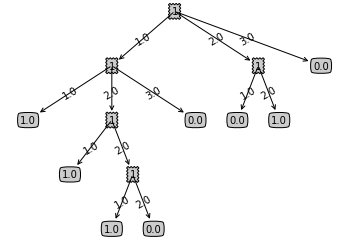

In [81]:
#在父子节点中填充文本信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    #计算宽和高
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()
    
createPlot(wmTree)#使用西瓜数据。

## 测试和存储分类器
前面的部分构造了决策树，本节将使用决策树构建分类器，以及实际应用中如何存储分类器。
### 使用决策树执行分类
依靠训练数据构造了决策树之后，就可以将它应用于实际数据的分类。在执行数据分类时，需要决策树以及构造树时的标签向量。然后，比较测试数据与决策树上的数值，递归执行该过程直到叶子节点；最后将测试数据定义为叶子节点所属的类。


In [82]:
def classify(inputTree,featLabels,testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)#将标签转化索引为
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict): 
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else: classLabel = valueOfFeat
    return classLabel

In [83]:
dataSet,labels=file2matrix(".\DataSet\watermelon_3.csv")
wmTree=createTree(dataSet,labels)
classify(wmTree,labels,[1,1,2,2,1,2])

1.0

### 决策树存储
即使处理很少的数据，构造决策树也是比较耗时的。为了节省构造决策树的时间，最好能够在每次执行分类时，直接调用已经构造好的决策树。

这可以使用python模块的pickle序列化对象，序列化对象可以在磁盘上保存对象，并在需要的时候读取出来。任何对象都可以执行序列化操作，字典对象也不例外。

以下函数分别存储字典到文件，从文件获取字典。

In [84]:
import pickle
def storeTree(inputTree,filename):
    #import pickle
    fw = open(filename,'wb')
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    #import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)
    

In [85]:
storeTree(wmTree,".\DataSet\decision-tree.txt")

In [86]:
newTree=grabTree('.\DataSet\decision-tree.txt')
newTree

{1: {1.0: {1: {1.0: 1.0,
    2.0: {1: {1.0: 1.0, 2.0: {1: {1.0: 1.0, 2.0: 0.0}}}},
    3.0: 0.0}},
  2.0: {1: {1.0: 0.0, 2.0: 1.0}},
  3.0: 0.0}}